# Patterns that define success of a game

## Project description
---
A **dataset** has been compiled from open sources with historical data up until 2016, including:

1. Game sales
2. User and critic reviews
3. Genres and platforms.

**Column Names:**
* `Name` — name of the game;
* `Platform` — gaming platform;
* `Year_of_Release` — year of release;
* `Genre` — game genre;
* `NA_sales` — sales in North America (millions of copies sold);
* `EU_sales` — sales in Europe (millions of copies sold);
* `JP_sales` — sales in Japan (millions of copies sold);
* `Other_sales` — sales in other countries (millions of copies sold);
* `Critic_Score` — critic score (maximum 100);
* `User_Score` — user score (maximum 10);
* `Rating` — rating from the Entertainment Software Rating Board (ESRB), an association that assigns age categories to computer games based on content.

## Task description
___

1. It is necessary to **work on the data analysis process** that enables the identification of patterns determining the success of a game.
2. This is required in order to **identify potentially popular products and plan a successful advertising campaign for the year 2017.**

## Data loading and exploration
___

### Libraries
---


In [173]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
import numpy as np
import matplotlib.ticker as ticker
import scipy as sc
pd.set_option("display.max_columns", None) #for displaying all columns

### Functions
---


In [174]:
#function, which shows head, tail, info, description, duplicates, counts Nan's and etc. of DF

def starting_pack(data):
    print('Main info about dataframe:')
    data.info()
    print()
    print('First rows of DF:')
    display(data.head())
    print('Last rows of DF:')
    display(data.tail())
    print('Number of duplicates:')
    display(data.duplicated().sum())
    print('Number of nans:')
    display(data.isna().sum())
    print('Description:')
    display(data.describe())
    print('Histograms:')
    data.hist(figsize=(7, 7));

### Dataset loading
---


In [175]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Data exploration
---

Main info about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

First rows of DF:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Last rows of DF:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Number of duplicates:


0

Number of nans:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Description:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Histograms:


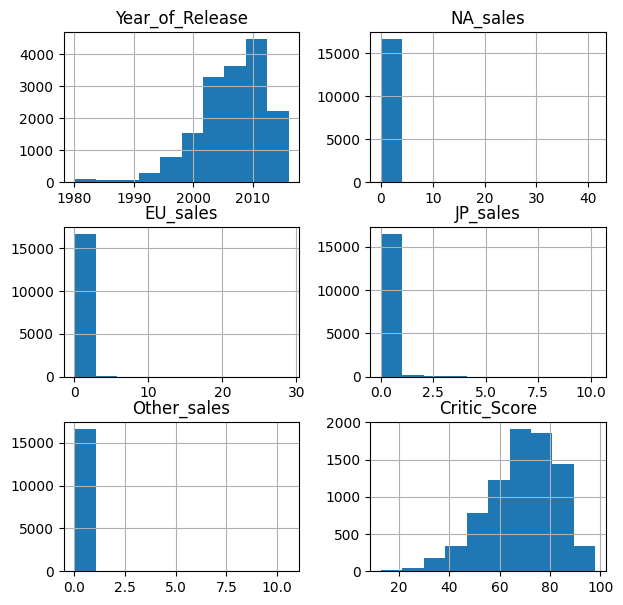

In [176]:
starting_pack(data)

From this data, it can be observed that the table consists of 16,715 rows and 11 columns.
The cell data types are as follows: float64(6), object(5).

Starting from around the year 2000, there is a sharp increase in the number of game releases.


**The data contains the following issues:**
1. Columns do not follow the "standard snake case" format (a mix of lowercase and uppercase).
2. Columns `Year_of_Release` and `User_Score` have incorrect data types. For the year, `int` or `datetime` should be used (depending on the research purpose), and for ratings, `float` is appropriate. But first, let's understand why these data types are present in the DataFrame.
3. Half of the columns contain spaces in the data.

## Data preprocessing
---

For better readability, let's change the column names to lowercase and use snake_case format. Additionally, we'll rename the column `Year_of_Release` to `release` to better indicate that it refers to the year of release.

In [177]:
#renaming columns
data = data.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

In [178]:
data['release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: release, dtype: int64

All rows correspond to years. Let's take a look at the rows with missing values.

In [179]:
data.query('release.isna()')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 269 missing values. We'll leave them as they are. It's highly unlikely these rows can be filled accurately unless thorough internet research is conducted. Consequently, there's no issue in changing the format to a more readable one.

Let's change the formats of the `release` and `user_score` columns to appropriate ones.

In [180]:
#changing formats
data.loc[data['release'].notnull(), 'release'] = data.loc[data['release'].notnull(), 'release'].apply(int)

In [181]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

The rating `"tbd"` means that the rating is "to be determined" due to the fact that the object has received fewer than 4 user reviews. Let's take a closer look at the rows with the value `"tbd"`.

In [182]:
data.query('user_score == "tbd"')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Based on the previous explanation of the abbreviation, we can confidently state that the abbreviation is equivalent to `NaN`. Therefore, we will replace the values with `NaN` and adjust the cell formats accordingly.

In [183]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

**Conclusion regarding rating metrics:** There is no need to fill in the missing values, as these are unpredictable data points (different platforms for the same game might have completely different ratings, remakes might be worse than originals, and so on).

Let's verify that the `rating` column contains only categorical data.

In [184]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Wikipedia informs us that the ratings from the "Entertainment Software Rating Board" (ESRB) organization correspond to the following categories:
> * "EC" ("Early childhood") — Suitable for early childhood (game is suitable for children aged 3 and older);
> * "E" ("Everyone")/ "K-A" ("Kids to Adults") (until 1998) — Everyone;
> * "E10+" ("Everyone 10 and older") — Everyone aged 10 and older;
> * "T" ("Teen") — Suitable for teens: Game is suitable for ages 13 and older;
> * "M" ("Mature") — Mature: Game content is suitable for ages 17 and older;
> * "AO" ("Adults Only 18+") — Adults Only: Content is only for adults aged 18 and older;
> * "RP" ("Rating Pending") — Rating Pending: The product has been submitted to the ESRB and is awaiting a rating.

However, there are still missing values. Let's replace them with `WoR` (Without Rating) since these categorical data will be needed for further research. We will also replace the rating `K-A` with `E`.

In [185]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'
data['rating'] = data['rating'].fillna('WoR')

Let's check for missing values in the `name` and `genre` columns.

In [186]:
data.query('name.isna()')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,WoR
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,WoR


It turns out that both games lack names, genres, and ratings, having only sales data. Let's remove these rows, as the data won't be significantly affected by the loss of these two rows.

In [187]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Let's take a look at the unique values for `name`, `platform`, and `genre`.

In [188]:
print('Unique game names:',len(data['name'].unique()))
print('Unique platforms:',len(data['platform'].unique()))
print('Unique genres:',len(data['genre'].unique()))

Unique game names: 11559
Unique platforms: 31
Unique genres: 12


Indeed, the number of genres and platforms seems reasonable, but let's verify if everything is in order with them.
There are quite a few game names, but they don't fill the entire length of the name column. We need to take a closer look.

Unique values in the `platform` column.

In [189]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Everything seems to be accurate. Indeed, in the gaming world, all platform abbreviations are encountered.

Unique values in the `genre` column.

In [190]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Absolutely right. These game genres are indeed common and valid.

Unique values in the `name` column.

In [191]:
data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Now it becomes clear that games with the same name are present in the DataFrame. Let's take a look at such rows using the example of `Need for Speed: Most Wanted`.

In [192]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,WoR
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,WoR
3580,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,WoR
6409,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Let's add a column for the total sales `total_sales`.

In [193]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Conclusion:**
1. The DataFrame contains identical games for different platforms, and even their remakes. Later, we may add a column to indicate if a game is a remake (reissued).
2. Information about game releases might have been lost due to incorrect parser settings or other automated processes. Such information is available on the internet.
3. Data regarding critic and user review metrics may be missing due to the reasons mentioned above or due to a lack of reviews.

## Data analysis
---

### Years of releaase
---

Let's see how many games were released in different years.

In [194]:
games_by_years = data.groupby('release').agg({'release':'count','total_sales':'sum'})
games_by_years.columns = ['count', 'total_sales']
games_by_years = games_by_years.sort_values(by='release', ascending=False).reset_index()
games_by_years

,release,count,total_sales
0,2016.0,502,129.94
1,2015.0,606,267.98
2,2014.0,581,331.53
3,2013.0,544,361.24
4,2012.0,653,355.84
5,2011.0,1136,507.58
6,2010.0,1255,590.13
7,2009.0,1426,658.82
8,2008.0,1427,671.50
9,2007.0,1197,604.75


For the research that will serve as the basis for the future advertising campaign, let's exclude games released before 1994, as their total count is negligible compared to the complete list.

In [195]:
games_by_years_1 = games_by_years.query('release > 1993')
games_by_years_1

,release,count,total_sales
0,2016.0,502,129.94
1,2015.0,606,267.98
2,2014.0,581,331.53
3,2013.0,544,361.24
4,2012.0,653,355.84
5,2011.0,1136,507.58
6,2010.0,1255,590.13
7,2009.0,1426,658.82
8,2008.0,1427,671.50
9,2007.0,1197,604.75


Let's create graphs reflecting the sales quantities by years.

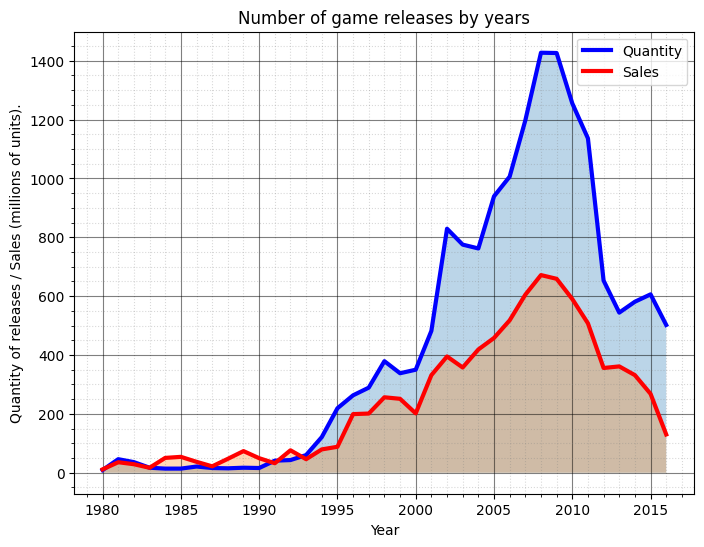

In [196]:
date = games_by_years['release']
value = games_by_years['count']
sales = games_by_years['total_sales']

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.5)

#grid minor
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':',
        alpha=0.3)
#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))

#filling under the line
ax.fill_between(date, 0, value, alpha=0.3)
ax.fill_between(date, 0, sales, alpha=0.3)

#OXY, Title names
ax.set_xlabel('Year')
ax.set_ylabel('Quantity of releases / Sales (millions of units).')
ax.set_title('Number of game releases by years')

#plot lines
ax.plot(date, value, color='blue',lw=3, label='Quantity')
ax.plot(date, sales, color='red',lw=3, label='Sales')

#legend
ax.legend();

**Conclusion**:

**From the graph, it's evident that:**
1. After the year 2000, there's a sharp increase in the number of game releases and their sales.
2. After 2009, there's a sharp decline.

Most likely, over the years and with the development of the Internet, game developers realized that it's more reasonable to develop (enhance, update, support) existing games rather than release new ones. Another explanation for the decline in the gaming industry on platforms could be attributed to mobile gaming.

### Platforms
---

Let's see **which platforms have been the most profitable over time**.

In [197]:
platform_by_sales_full = data.groupby('platform').agg({'release':'count','total_sales':'sum'})
platform_by_sales_full.columns = ['count', 'total_sales']
platform_by_sales_full = platform_by_sales_full.sort_values(by='total_sales', ascending=False).reset_index()
platform_by_sales_full

,platform,count,total_sales
0,PS2,2127,1255.77
1,X360,1232,971.42
2,PS3,1306,939.65
3,Wii,1286,907.51
4,DS,2121,806.12
5,PS,1190,730.86
6,GBA,811,317.85
7,PS4,392,314.14
8,PSP,1193,294.05
9,PC,957,259.52


Let's examine the dynamics of game sales for the top 10 consoles over different years.

In [198]:
top_platforms = platform_by_sales_full['platform'][0:10].unique()
print(top_platforms)

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'GBA' 'PS4' 'PSP' 'PC']


In [199]:
#pivot table of top platforms total sales by year
platforms_top = data.query('platform in @top_platforms').pivot_table(index = 'release',
                                 columns = 'platform',
                                 values = 'total_sales',
                                 aggfunc = 'sum').reset_index()
platforms_top

platform,release,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
0,1985.0,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988.0,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992.0,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994.0,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
4,1995.0,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
5,1996.0,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
6,1997.0,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
7,1998.0,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
8,1999.0,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN
9,2000.0,NaN,0.07,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN


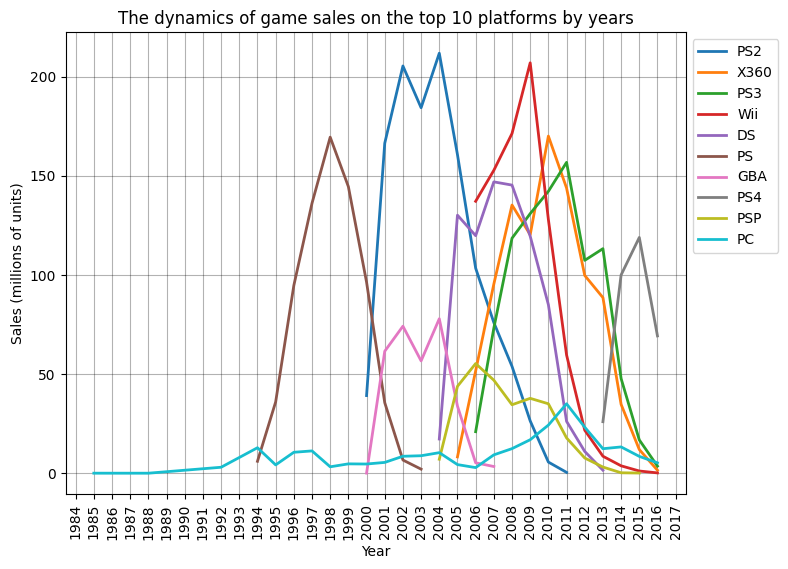

In [200]:
date = platforms_top['release']
value = platforms_top[top_platforms]

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.3)

#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#OXY, Title names
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions of units)')
ax.set_title('The dynamics of game sales on the top 10 platforms by years')

#plot lines
ax.plot(date, value,lw=2)

#legend
ax.legend(top_platforms, bbox_to_anchor=(1, 1));

#xticks rotation
plt.xticks(rotation=90);

**From the graph, it can be concluded that:**
1. `PS` remained popular for around 10 years.
2. `PS2` remained popular for around 11 years.
3. `DS` remained popular for around 10 years.
4. `GBA` remained popular for around 8 years.
5. The transition from one console generation to another takes around 3 years.
6. `PC` gaming will always be relevant.


### Actual data
---

Let's examine the sales dynamics **for the last 5 years, from 2012 to 2016.**

In [201]:
platform_by_sales_5 = data.query('2011 < release < 2017').groupby('platform').agg({'release':'count','total_sales':'sum'})
platform_by_sales_5.columns = ['count', 'total_sales']
platform_by_sales_5 = platform_by_sales_5.sort_values(by='total_sales', ascending=False).reset_index()
platform_by_sales_5

,platform,count,total_sales
0,PS4,392,314.14
1,PS3,493,288.79
2,X360,292,236.54
3,3DS,396,194.61
4,XOne,247,159.32
5,WiiU,147,82.19
6,PC,250,62.65
7,PSV,411,49.18
8,Wii,54,35.37
9,DS,31,12.55


We ended up with a top 11. Let's consider this list since games eventually stop being released on older platforms due to the emergence of new generations or platforms.

Let's take a closer look at these platforms year by year.

In [202]:
top_platforms_last5 = platform_by_sales_5['platform'].unique()
print(top_platforms_last5)

['PS4' 'PS3' 'X360' '3DS' 'XOne' 'WiiU' 'PC' 'PSV' 'Wii' 'DS' 'PSP']


In [203]:
platforms_by_sales = data.query('2011 < release < 2017')

#pivot table of platform total sales by year
platforms_by_sales = platforms_by_sales.pivot_table(index = 'release',
                                                  columns = 'platform',
                                                  values = 'total_sales',
                                                  aggfunc = 'sum').reset_index()
platforms_by_sales

platform,release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


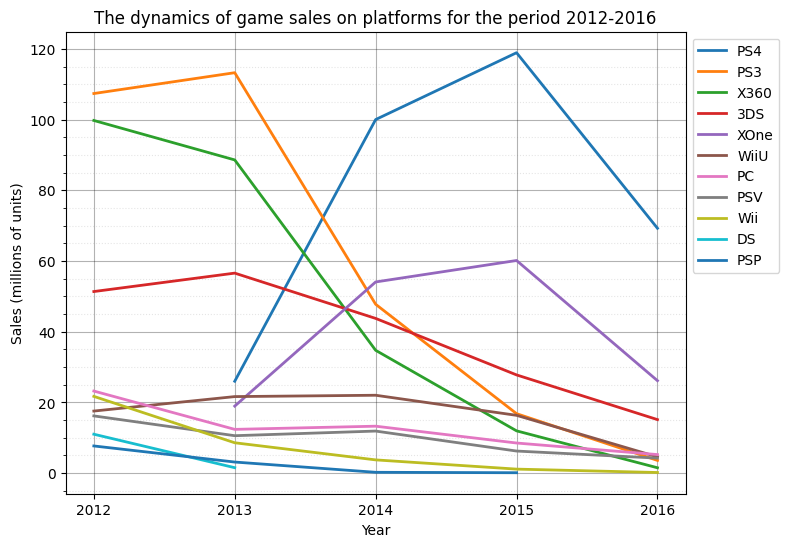

In [204]:
date = platforms_by_sales['release']
value = platforms_by_sales[top_platforms_last5]

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.3)

#grid minor
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':',
        alpha=0.2)
#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#OXY, Title names
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions of units)')
ax.set_title('The dynamics of game sales on platforms for the period 2012-2016')

#plot lines
ax.plot(date, value,lw=2)

#legend
ax.legend(top_platforms_last5, bbox_to_anchor=(1, 1));

**From the graph, it's evident that:**
1. Almost all platforms have a tendency towards decreasing sales.
2. Platforms that deserve special attention are `PS4` and `XOne`, as they were introduced quite recently, and their sales dynamics look optimistic.
3. The `DS` platform became obsolete after 2013.
4. The `PSP` platform became obsolete after 2015.

**Conclusion:**
1. The average lifespan of a platform is approximately 10 years.
2. Based on the generational shift of consoles like `PS-PS2-PS3`, it can be noted that the `PS3` console will likely lose its popularity by around 2017-2018 (confirmed by the pivot table before the graph).
3. To forecast game sales, a 5-year period could be considered, as platforms that emerge within this timeframe will continue to gain popularity for another 2-3 years and remain profitable even as their popularity declines.
4. Promising platforms: `PS4`, `XOne`, `PC`.
5. Platforms that will remain relevant for some time: `PS3`, `X360`, `WiiU`, `3DS`.
___

### Period 2012-2016
---

**For further analysis**, let's sort the original dataset based on data from 2012 to 2016.

In [205]:
actual_data = data.query(('release > 2011')) #DATAFRAME OF ACTUAL PERIOD
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


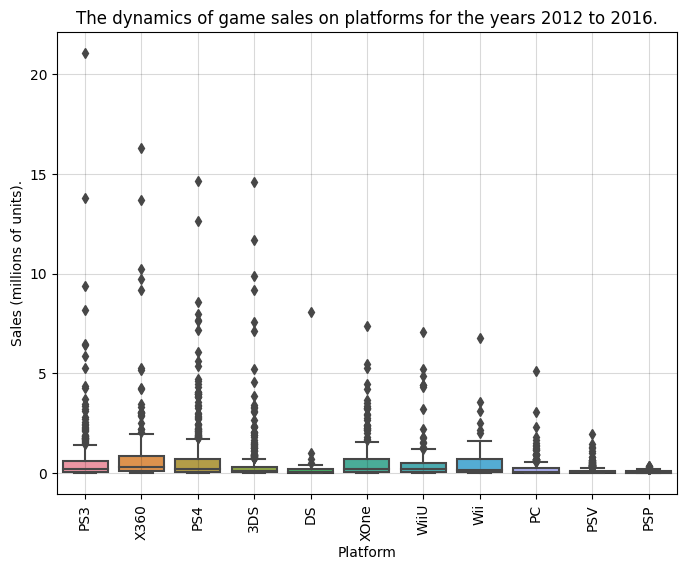

In [206]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])

#limits
#ax.set_ylim(0,3)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Platform')
ax.set_ylabel('Sales (millions of units).')
ax.set_title('The dynamics of game sales on platforms for the years 2012 to 2016.');


#xticks rotation
plt.xticks(rotation=90);

Platforms `PS3`, `X360`, `PS4`, `3DS` had some standout games during their time.

Let's take a closer look at the graph.

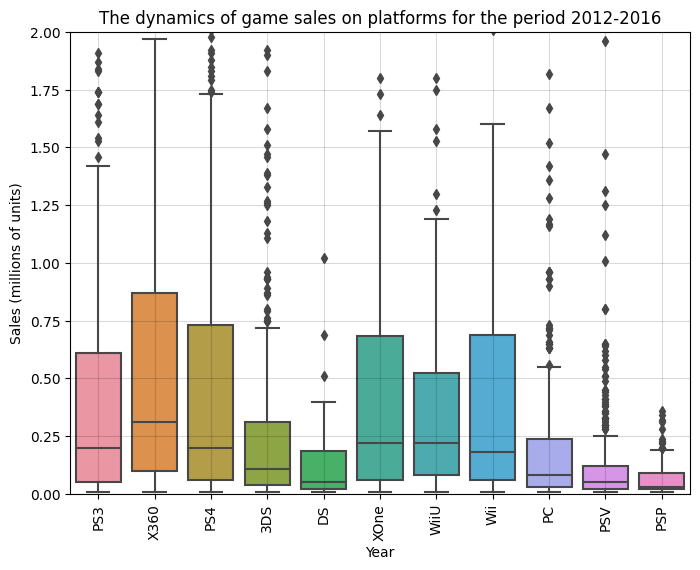

In [207]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])

#limits
ax.set_ylim(0,2)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions of units)')
ax.set_title('The dynamics of game sales on platforms for the period 2012-2016')


#xticks rotation
plt.xticks(rotation=90);

**Cocnlusion**:

1. The most promising platforms are `PS4`, `XOne`, `PS3`, `X360`.
2. It's noticeable that each platform has spikes representing the most successful games in terms of sales.


### Sales depend on reviews
---

**How do reviews affect sales?**

Let's examine how user and critic reviews influence sales within the context of a popular platform. We'll use `PS4` for this analysis since it performed well in the recent period.

#### PS4
---

In [208]:
ps4_scores = actual_data.query('platform == "PS4"').groupby('platform')['critic_score','user_score'].agg(['mean','median']).round(2)
ps4_scores

<ipython-input-208-c337a2dba367>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ps4_scores = actual_data.query('platform == "PS4"').groupby('platform')['critic_score','user_score'].agg(['mean','median']).round(2)


critic_score        user_score       
                 mean median       mean median
platform                                      
PS4             72.09   73.0       6.75    7.0

Let's create a scatter plot for `critic_score` and `total_sales`, and calculate the Pearson correlation coefficient.

Pearson correlation coefficient: 0.40656790206178095


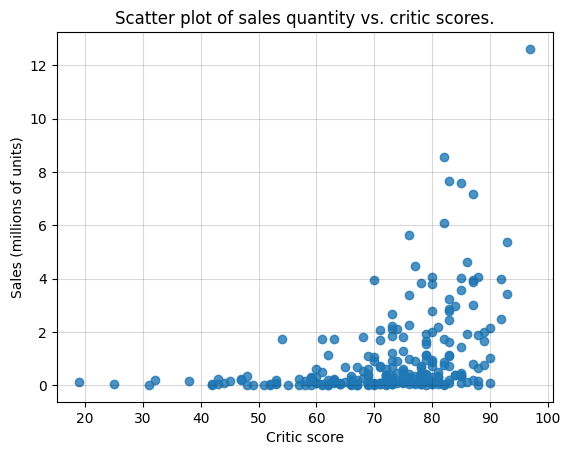

In [209]:
data_for_ps4 = actual_data.query('platform == "PS4"')

print('Pearson correlation coefficient:',data_for_ps4['critic_score'].corr(data_for_ps4['total_sales']))

#figure
ax = sb.regplot(x = data_for_ps4['critic_score'],
                y = data_for_ps4['total_sales'],
                fit_reg=False,
               )
#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Critic score')
ax.set_ylabel('Sales (millions of units)')
ax.set_title('Scatter plot of sales quantity vs. critic scores.');

Let's create a scatter plot for `user_score` and `total_sales`, and calculate the Pearson correlation coefficient.

Pearson correlation coefficient: -0.031957110204556424


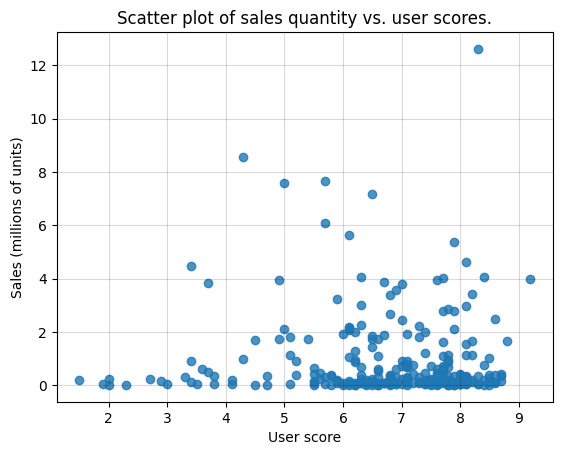

In [210]:
print('Pearson correlation coefficient:',data_for_ps4['user_score'].corr(data_for_ps4['total_sales']))

#figure
ax = sb.regplot(x = data_for_ps4['user_score'],
                y = data_for_ps4['total_sales'],
                fit_reg=False,
               )
#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('User score')
ax.set_ylabel('Sales (millions of units)')
ax.set_title('Scatter plot of sales quantity vs. user scores.');

**Conclusions:**

1. The correlation coefficient indicates a weak correlation, which is present for critic scores and absent for user scores.
2. There doesn't seem to be a clear correlation based on the scatter plots.

Probably, all the actual platforms need to be checked same way.

#### All actual platforms
---

Platform PS4
Pearson correlation coefficient: critic_score и total_sales 0.40656790206178095


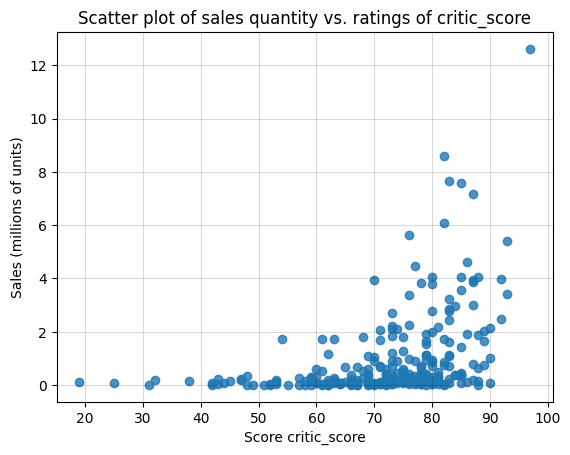

Pearson correlation coefficient: user_score и total_sales -0.031957110204556424


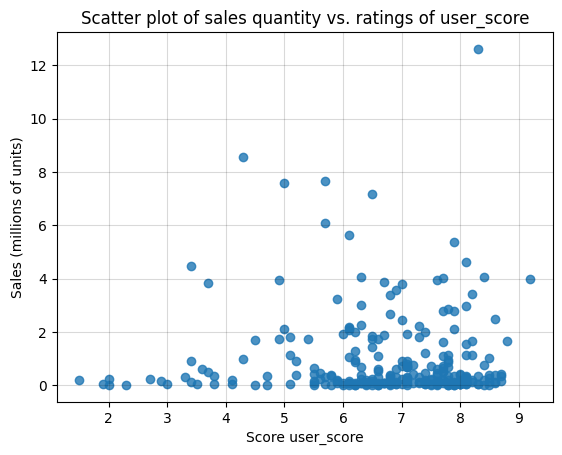

Platform XOne
Pearson correlation coefficient: critic_score и total_sales 0.4169983280084017


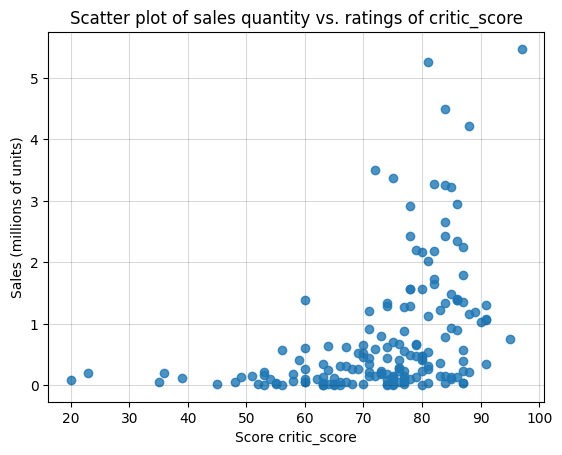

Pearson correlation coefficient: user_score и total_sales -0.06892505328279414


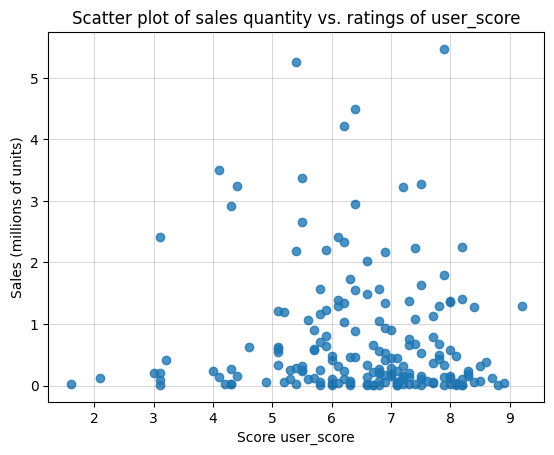

Platform PC
Pearson correlation coefficient: critic_score и total_sales 0.23724324311567915


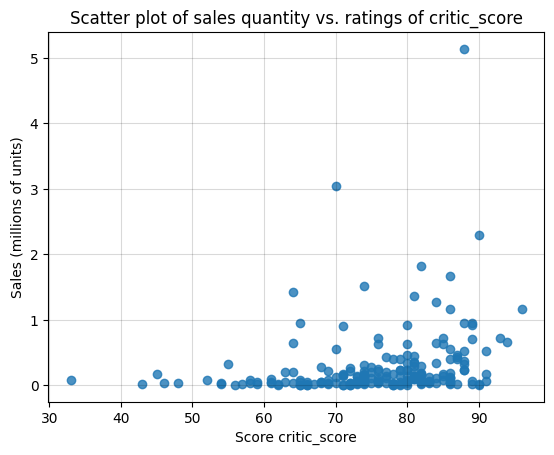

Pearson correlation coefficient: user_score и total_sales -0.12186747630735577


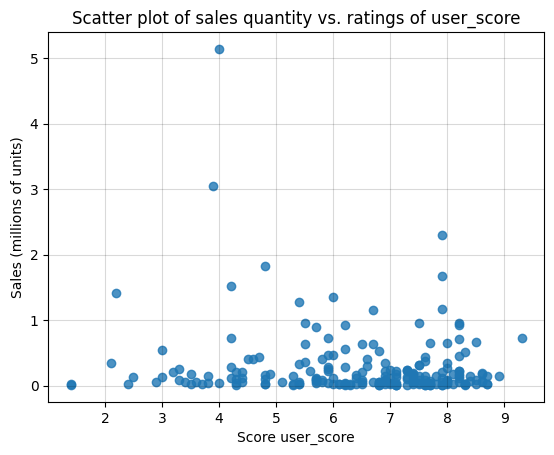

Platform PS3
Pearson correlation coefficient: critic_score и total_sales 0.3314972592629587


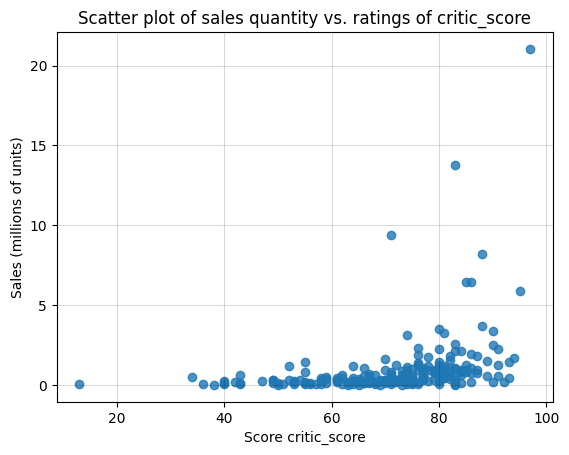

Pearson correlation coefficient: user_score и total_sales -0.005143522887113815


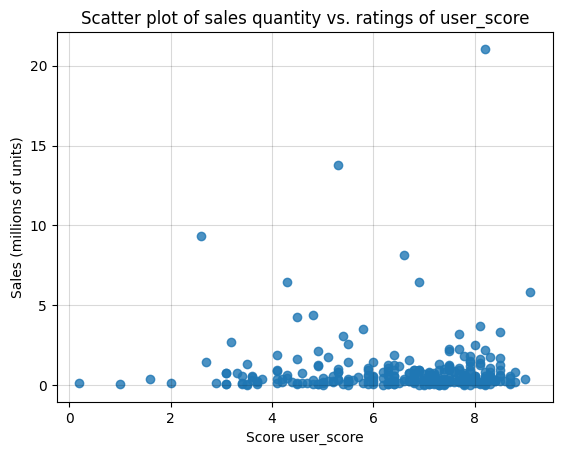

Platform X360
Pearson correlation coefficient: critic_score и total_sales 0.3605734888507336


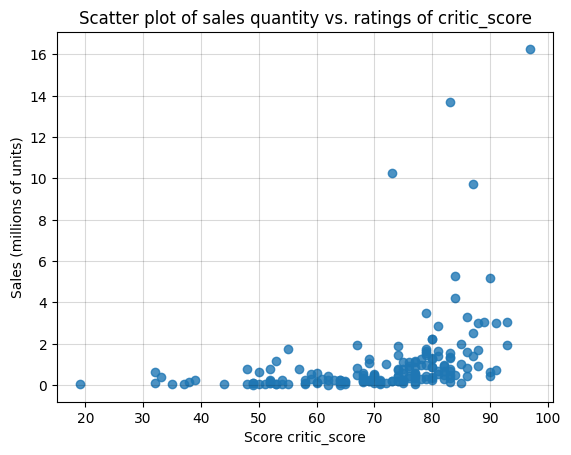

Pearson correlation coefficient: user_score и total_sales 0.006163978646213326


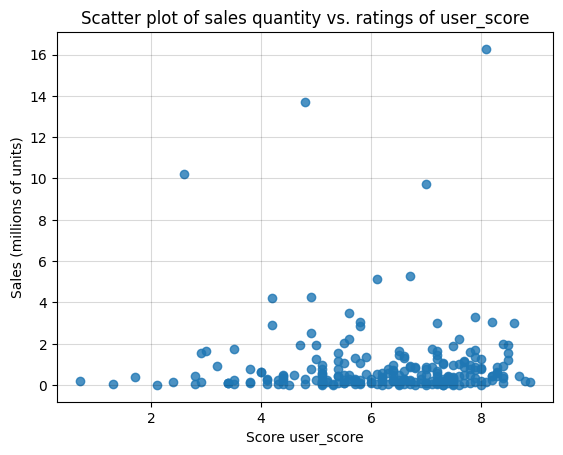

Platform WiiU
Pearson correlation coefficient: critic_score и total_sales 0.34837976012017485


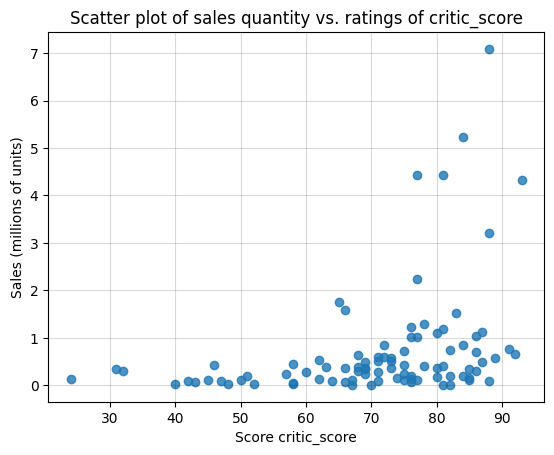

Pearson correlation coefficient: user_score и total_sales 0.4002190202148617


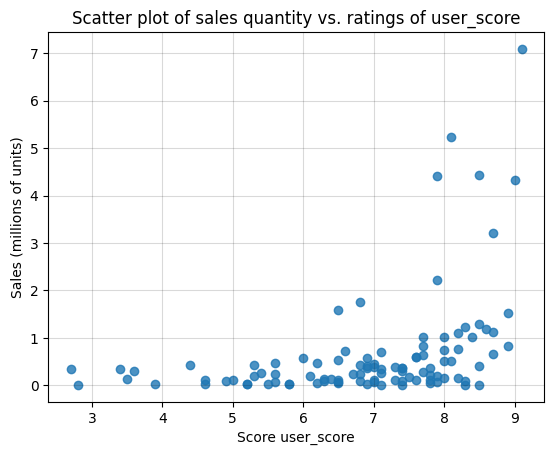

Platform 3DS
Pearson correlation coefficient: critic_score и total_sales 0.3208028695360785


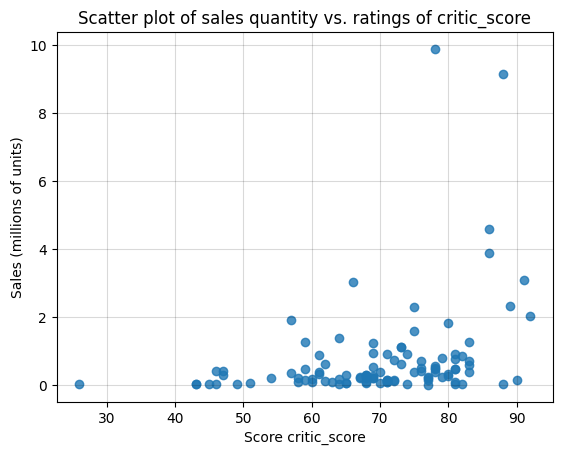

Pearson correlation coefficient: user_score и total_sales 0.19758263411038599


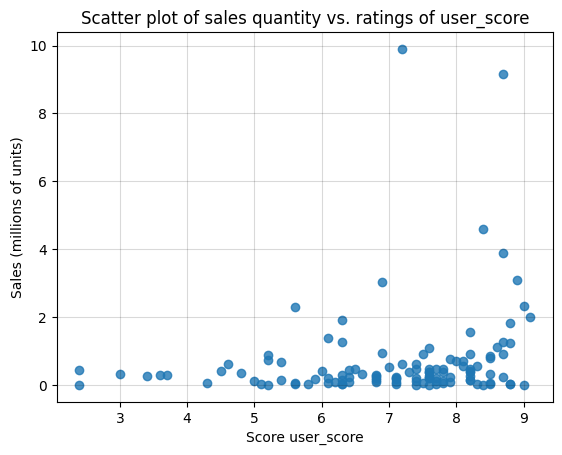

In [211]:
# actual_platforms - list of actual platforms
actual_platforms = ['PS4','XOne', 'PC','PS3','X360', 'WiiU', '3DS']
# actual_data - dataframe of actual platforms and years
score_types = ['critic_score', 'user_score']

for platform in actual_platforms:
    print('Platform', platform)
    for score in score_types:
        print('Pearson correlation coefficient:', score, 'и total_sales',
              actual_data.query('platform == @platform')[score]\
              .corr(actual_data.query('platform == @platform')['total_sales']))

        #figure
        ax = sb.regplot(x = actual_data.query('platform == @platform')[score],
                y = actual_data.query('platform == @platform')['total_sales'],
                fit_reg=False,
               )

        #grid major
        ax.grid(which='major',
               color = 'black', alpha=0.15)

        #OXY, Title names
        ax.set_xlabel(f'Score {score}')
        ax.set_ylabel('Sales (millions of units)')
        ax.set_title(f'Scatter plot of sales quantity vs. ratings of {score}')


        plt.show()

**Conclusions:**

1. The relationship between critic and user reviews and total sales for all platforms is similar to that of the `PS4` platform.
2. For the `WiiU` platform, user reviews correlate more strongly with sales quantity compared to critic reviews (Japan is indeed a different market).

### Sales depend on reviews
---

Let's take a look at the distribution of games by **genres and how they relate to sales**.

In [212]:
genre_data = data.groupby('genre').agg({'total_sales':['count','sum','median']})
genre_data.columns = ['count', 'sum','median']
genre_data = genre_data.sort_values(by='count', ascending=False).reset_index()
display(genre_data)
display(genre_data.sort_values(by='sum', ascending=False))
display(genre_data.sort_values(by='median', ascending=False))

,genre,count,sum,median
0,Action,3369,1744.17,0.19
1,Sports,2348,1331.27,0.22
2,Misc,1750,802.51,0.16
3,Role-Playing,1498,934.56,0.18
4,Shooter,1323,1052.45,0.24
5,Adventure,1303,237.59,0.05
6,Racing,1249,728.67,0.19
7,Platform,888,827.77,0.27
8,Simulation,873,389.97,0.15
9,Fighting,849,447.53,0.21


,genre,count,sum,median
0,Action,3369,1744.17,0.19
1,Sports,2348,1331.27,0.22
4,Shooter,1323,1052.45,0.24
3,Role-Playing,1498,934.56,0.18
7,Platform,888,827.77,0.27
2,Misc,1750,802.51,0.16
6,Racing,1249,728.67,0.19
9,Fighting,849,447.53,0.21
8,Simulation,873,389.97,0.15
11,Puzzle,580,242.57,0.11


,genre,count,sum,median
7,Platform,888,827.77,0.27
4,Shooter,1323,1052.45,0.24
1,Sports,2348,1331.27,0.22
9,Fighting,849,447.53,0.21
0,Action,3369,1744.17,0.19
6,Racing,1249,728.67,0.19
3,Role-Playing,1498,934.56,0.18
2,Misc,1750,802.51,0.16
8,Simulation,873,389.97,0.15
11,Puzzle,580,242.57,0.11


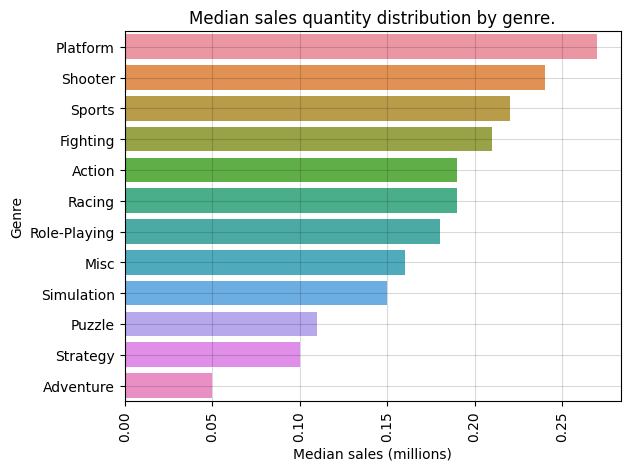

In [213]:
genre_data = genre_data.sort_values(by='median', ascending=False).reset_index()

#figure
ax = sb.barplot(x=genre_data['median'], y=genre_data['genre'])

#OXY, Title names
ax.set_xlabel('Median sales (millions)')
ax.set_ylabel('Genre')
ax.set_title('Median sales quantity distribution by genre.');

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#xticks rotation
plt.xticks(rotation=90);

It's clear that the `Action` genre leads in terms of sales and total revenue. The `Shooter` genre has also shown promise: it has slightly fewer games in terms of quantity, but is more profitable than `Role-Playing`. It's best to avoid the `Adventure` genre, as sales performance in that category is not promising. However, the `Platform` genre leads in terms of median sales (which can be interpreted as showing consistent performance).

Let's take a look at the box plots of game sales by genre over the entire period.

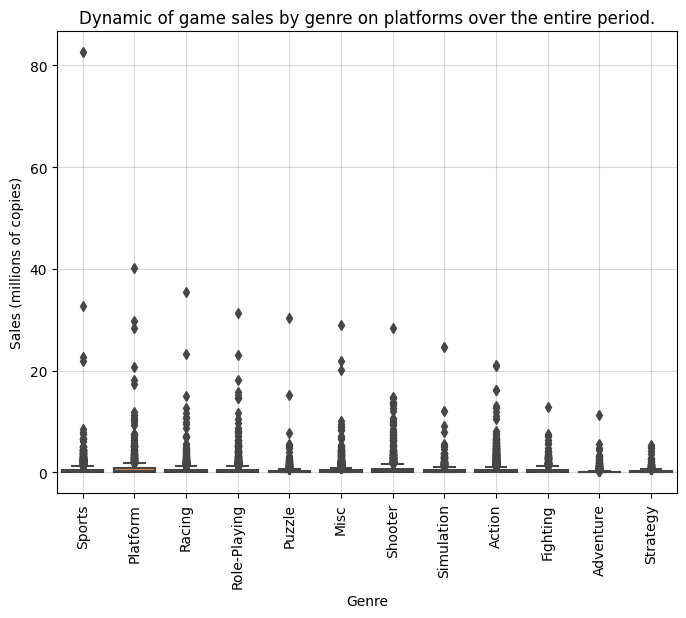

In [214]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=data['genre'], y=data['total_sales'])

#limits
#ax.set_ylim(0,3)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Genre')
ax.set_ylabel('Sales (millions of copies)')
ax.set_title('Dynamic of game sales by genre on platforms over the entire period.');

#xticks rotation
plt.xticks(rotation=90);

It seems you are referring to a box plot or a similar visualization. Could you please clarify which specific type of diagram you're referring to? This will help me provide you with accurate information and insights.

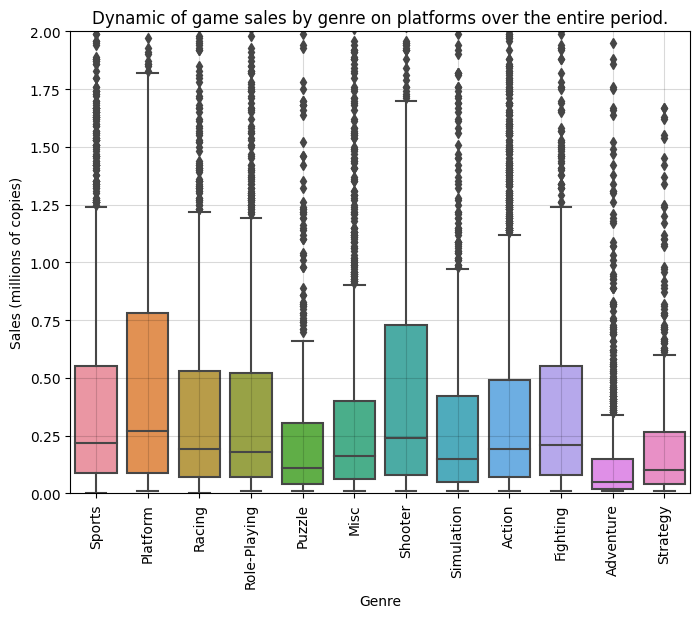

In [215]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=data['genre'], y=data['total_sales'])

#limits
ax.set_ylim(0,2)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Genre')
ax.set_ylabel('Sales (millions of copies)')
ax.set_title('Dynamic of game sales by genre on platforms over the entire period.');

#xticks rotation
plt.xticks(rotation=90);

**Conclusion:**
1. The `Action` genre leads in terms of sales and total revenue.
2. `Shooter` genre is slightly behind in terms of game quantity but more profitable than `Role-Playing`.
3. It's best to avoid focusing on the `Adventure` genre as it doesn't perform well in terms of sales.
4. The `Platform` genre is the leader in terms of median sales (interpreted as being consistently stable).
5. The most consistent genre among all is `Sports`.

So, the top genres that perform well are:
1. `Action`
2. `Sports`
3. `Shooter`


### User portraits by region
---

Popular **platforms by region**.

In [216]:
region_data = actual_data.groupby('platform')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(region_data)

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


Distribution of sales by platforms in NA:


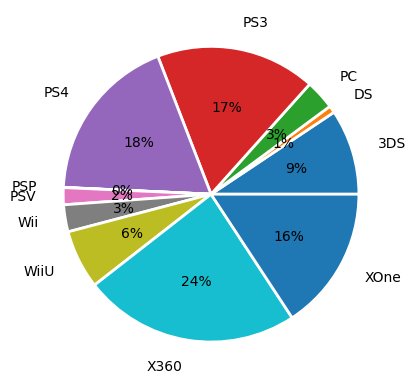

Distribution of sales by platforms in EU:


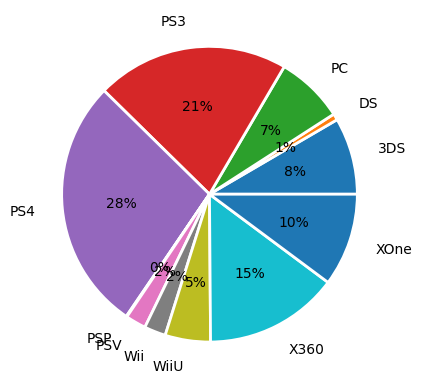

Distribution of sales by platforms in JP:


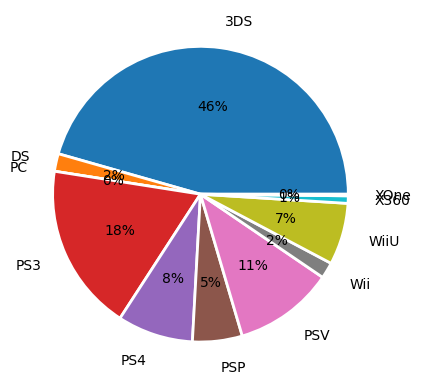

In [217]:
region_sales = ['na_sales','eu_sales','jp_sales']
for region in region_sales:

    #Pieplot
    plt.pie(region_data[region], #column
            labels=region_data['platform'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.0f%%'); #percentage

    print(f'Distribution of sales by platforms in {region[0:2].upper()}:')
    plt.show();

**Conclusion:**

1. In the North American region, Xbox platforms are leading the sales.
2. In Europe, 51% of the platforms are PlayStation.
3. In Japan, there is no significant presence of PC gaming, and the leadership is dominated by Nintendo. Notably, Xbox platforms are almost unpopular.

The popularity of platforms is distributed quite distinctly, as they are owned by companies originating from similar regions. The exception is the popularity of PlayStation in Europe, which might be attributed to Sony's efforts directed towards the European market.

### Genres by region
---

In [218]:
region_genre = actual_data.groupby('genre')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(region_genre)

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


Distribution of popular genres by platforms in NA:


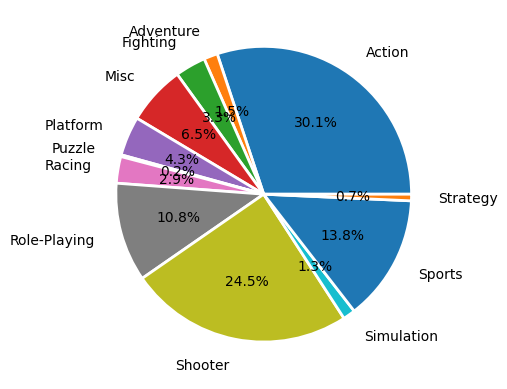

Distribution of popular genres by platforms in EU:


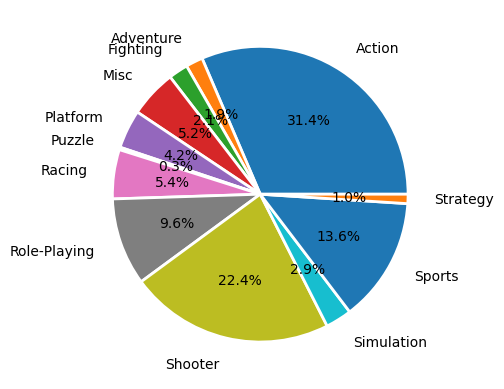

Distribution of popular genres by platforms in JP:


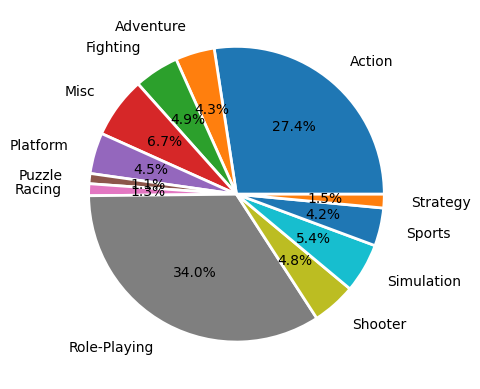

In [219]:
for region in region_sales:

    #Pieplot
    plt.pie(region_genre[region], #column
            labels=region_genre['genre'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.1f%%'); #percentage

    print(f'Distribution of popular genres by platforms in {region[0:2].upper()}:')
    plt.show();

**Conclusion:**

1. The most popular genres in the regions of `NA` and `EU` are `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`.
2. In the `JP` region, the popular genres are `Role-Playing`, `Action`, `Simulation`, `Shooter`, `Misc`.

The prediction is correct: Japan is indeed a different gaming world.

### ESRB ratings by regions and their impact on sales
---

In [220]:
ratings_region = actual_data.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(ratings_region)

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02
4,WoR,103.31,91.50,108.84


Distribution of game ratings in NA:


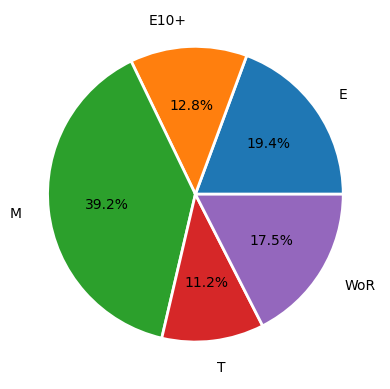

Distribution of game ratings in EU:


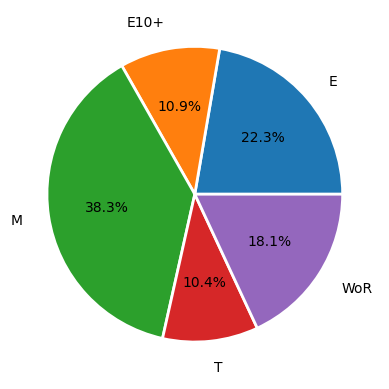

Distribution of game ratings in JP:


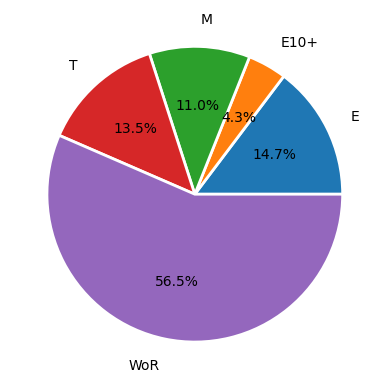

In [221]:
for region in region_sales:

    #Pieplot
    plt.pie(ratings_region[region], #column
            labels=ratings_region['rating'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.1f%%'); #percentage

    print(f'Distribution of game ratings in {region[0:2].upper()}:')
    plt.show();

Total sales and the number of games by ESRB ratings in NA:


na_sales      
            sum count
rating               
E        114.37   395
E10+      75.70   306
M        231.57   498
T         66.02   412
WoR      103.31  1275

Table of correlation between ESRB ratings and sales in NA:


na_sales         
                    sum    count
na_sales sum    1.00000  0.01403
         count  0.01403  1.00000

Total sales and the number of games by ESRB ratings in EU:


eu_sales      
            sum count
rating               
E        113.03   395
E10+      55.37   306
M        193.96   498
T         52.96   412
WoR       91.50  1275

Table of correlation between ESRB ratings and sales in EU:


eu_sales         
                    sum    count
eu_sales sum    1.00000  0.04525
         count  0.04525  1.00000

Total sales and the number of games by ESRB ratings in JP:


jp_sales      
            sum count
rating               
E         28.33   395
E10+       8.19   306
M         21.20   498
T         26.02   412
WoR      108.84  1275

Table of correlation between ESRB ratings and sales in JP:


jp_sales          
                     sum     count
jp_sales sum    1.000000  0.985927
         count  0.985927  1.000000

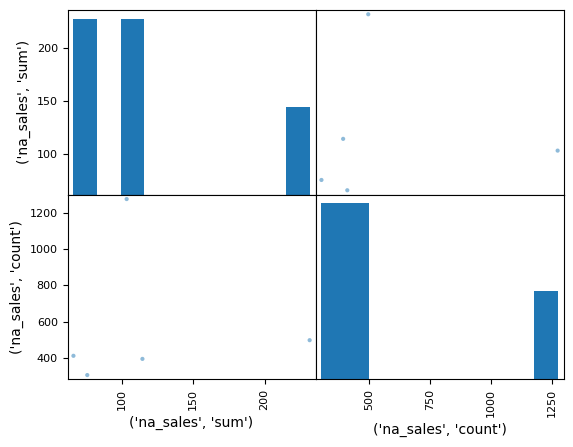

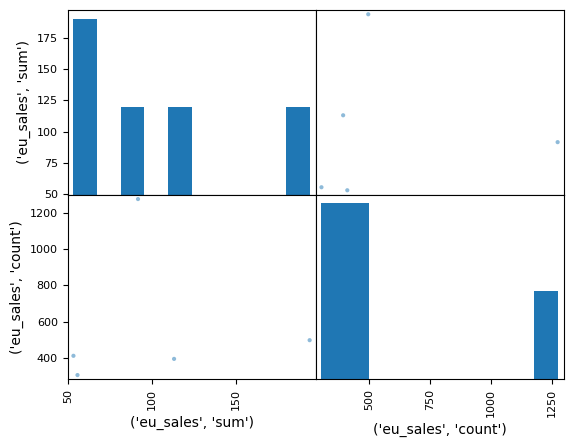

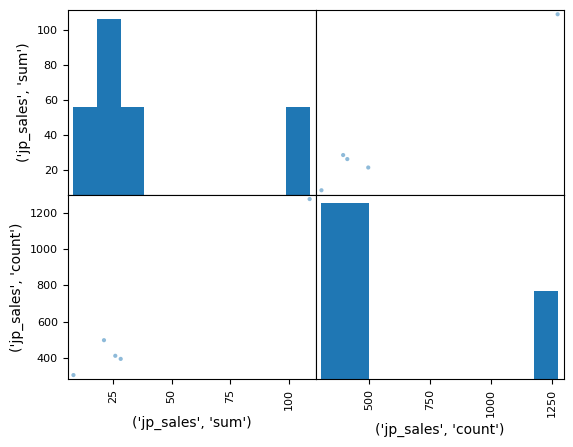

In [222]:
for region in region_sales:
    temp_table = actual_data.groupby('rating').agg({region:['sum','count']})
    print(f'Total sales and the number of games by ESRB ratings in {region[0:2].upper()}:')
    display(temp_table)
    print(f'Table of correlation between ESRB ratings and sales in {region[0:2].upper()}:')
    display(temp_table.corr())
    pd.plotting.scatter_matrix(temp_table)

**Conclusion:**

1. The distribution of ESRB ratings in North America and Europe shows a similar pattern. The `M` (Mature) rating, indicating games for players aged 17 and older, is the most common.
2. Japan appears to be quite different in terms of ESRB ratings distribution. Most games lack a rating. This could be due to different rating assignment rules and overall user preferences in that region.
3. ESRB ratings do not seem to have a significant impact on game sales in North America and Europe. However, in Japan, there is a strong correlation between a game's rating and its sales, indicating that games with higher age ratings tend to sell better.
4. Given that shooters and action games are popular worldwide, it's likely that categorical ESRB ratings will dominate the datasets.

### Hypothesis Testing
---

#### The average user ratings for Xbox One and PC platforms are the same.

Sure, let's proceed with the hypothesis testing using the t-test method for two independent samples. We'll calculate the variances using the `ttest_ind` function since we don't know if the samples are equal and what their variances are.

First, let's prepare the samples and remove any missing values from them as the method cannot work with missing values.

***Samples for the period 2012-2016***

Statistical hypothesis:
 * H0: The average user ratings for Xbox One and PC platforms are **equal**.
 * H1: The average user ratings for Xbox One and PC platforms are **different**. (Since an alternative hypothesis was not provided, it will be the opposite of H0, which means "not equal" == "different").

In [223]:
xone_user_score = actual_data.query('platform == "XOne" ')
xone_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16670
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          247 non-null    object 
 1   platform      247 non-null    object 
 2   release       247 non-null    float64
 3   genre         247 non-null    object 
 4   na_sales      247 non-null    float64
 5   eu_sales      247 non-null    float64
 6   jp_sales      247 non-null    float64
 7   other_sales   247 non-null    float64
 8   critic_score  169 non-null    float64
 9   user_score    182 non-null    float64
 10  rating        247 non-null    object 
 11  total_sales   247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


182 ratings. This quantity should be sufficient.

In [224]:
xone_user_score = xone_user_score.dropna(subset = ['user_score'])

In [225]:
pc_user_score = actual_data.query('platform == "PC" ')
pc_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 192 to 16690
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          250 non-null    object 
 1   platform      250 non-null    object 
 2   release       250 non-null    float64
 3   genre         250 non-null    object 
 4   na_sales      250 non-null    float64
 5   eu_sales      250 non-null    float64
 6   jp_sales      250 non-null    float64
 7   other_sales   250 non-null    float64
 8   critic_score  198 non-null    float64
 9   user_score    206 non-null    float64
 10  rating        250 non-null    object 
 11  total_sales   250 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.4+ KB


205 ratings. This quantity is sufficient.

In [226]:
pc_user_score = pc_user_score.dropna(subset = ['user_score'])

Set the significance level (Student's criterion) to 5%, following commonly accepted practices.

In [227]:
alpha = 0.05

Let's test the hypothesis H0: **The average user ratings for Xbox One and PC platforms are the same.**

In [228]:
#checking 2-side hyp.
results = sc.stats.ttest_ind(xone_user_score['user_score'], pc_user_score['user_score'], equal_var=False)
print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is not rejected.")

P-value: 0.5489537965134912
The null hypothesis is not rejected.


Interesting result...

Let's test this hypothesis "manually".


In [229]:
hyp1_data = actual_data.query('platform in ["XOne","PC"]').pivot_table(index = 'platform',
                                                                values = 'user_score',
                                                                aggfunc = 'mean').reset_index()
display(hyp1_data)

,platform,user_score
0,PC,6.428641
1,XOne,6.521429


In [230]:
print('The mean values differ (%)', (1 - hyp1_data['user_score'][0]/hyp1_data['user_score'][1])*100)

The mean values differ (%) 1.4228139388977046


**Conclusions:**

1. The average user ratings for the Xbox One and PC platforms are indeed the same (the differences are not statistically significant).
2. If the significance level (alpha) for the t-test is changed to 1%, the hypothesis of equal mean ratings would be rejected.

#### The average user ratings for the Action and Sports genres are different
---

#### The hypothesis in statistical terms:
* H0: The average user rating of the Action and Sports genres is **equal**.
* H1: The average user rating of the Action and Sports genres is **different**.

(The statistical difference will be greater than the error criterion, thus the probability of falling into a region close to one of the average values is greater than the probability of error).

In [231]:
action_user_score = actual_data.query('genre == "Action" ')
action_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 16 to 16708
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1031 non-null   object 
 1   platform      1031 non-null   object 
 2   release       1031 non-null   float64
 3   genre         1031 non-null   object 
 4   na_sales      1031 non-null   float64
 5   eu_sales      1031 non-null   float64
 6   jp_sales      1031 non-null   float64
 7   other_sales   1031 non-null   float64
 8   critic_score  436 non-null    float64
 9   user_score    523 non-null    float64
 10  rating        1031 non-null   object 
 11  total_sales   1031 non-null   float64
dtypes: float64(8), object(4)
memory usage: 104.7+ KB


In [232]:
sports_user_score = actual_data.query('genre == "Sports" ')
sports_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 77 to 16641
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          268 non-null    object 
 1   platform      268 non-null    object 
 2   release       268 non-null    float64
 3   genre         268 non-null    object 
 4   na_sales      268 non-null    float64
 5   eu_sales      268 non-null    float64
 6   jp_sales      268 non-null    float64
 7   other_sales   268 non-null    float64
 8   critic_score  143 non-null    float64
 9   user_score    195 non-null    float64
 10  rating        268 non-null    object 
 11  total_sales   268 non-null    float64
dtypes: float64(8), object(4)
memory usage: 27.2+ KB


Deleting `NaN`

In [233]:
action_user_score = action_user_score.dropna(subset = ['user_score'])
sports_user_score = sports_user_score.dropna(subset = ['user_score'])

We have enough values. Let's test the null hypothesis.

In [234]:
#checking 2-side hyp.
results = sc.stats.ttest_ind(action_user_score['user_score'], sports_user_score['user_score'], equal_var=False)
print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is not rejected.")

P-value: 4.24307776572644e-20
The null hypothesis is rejected.


Let's check it manually for more confidence.

In [235]:
hyp2_data = actual_data.query('genre in ["Sports","Action"]').pivot_table(index = 'genre',
                                                                values = 'user_score',
                                                                aggfunc = 'mean').reset_index()
display(hyp2_data)
print('The average values differ by approximately (%)', (1 - hyp2_data['user_score'][1]/hyp2_data['user_score'][0])*100)

,genre,user_score
0,Action,6.825048
1,Sports,5.455897


The average values differ by approximately (%) 20.060670710901817


Yes, the difference is larger than the significance level of the Student's t-test, so we reject the null hypothesis (statistical difference > error criterion) and accept the alternative hypothesis.

**Conclusion:**

The average user ratings for the Action and Sports genres are different.

## Conclusion
---

A sample was obtained with historical data on game sales, user and critic reviews, genres, and platforms up until 2016. The sample consists of 16,715 entries.

The sample had the following issues:

1. Columns did not have a consistent naming convention (mix of lowercase and uppercase).
2. The columns `Year_of_Release` and `User_Score` had incorrect data types. `int` should have been used for the release year, and `float` for the ratings.
3. Many columns had missing values.

The following changes were made to the sample:

1. Column names were changed to have consistent naming conventions, and the `Year_of_Release` column was renamed to `release` for clarity.
2. The formats of the `release` and `user_score` columns were corrected.
3. Ratings with the value `"tbd"` were changed to `NaN` to indicate ratings pending further review.
4. Missing values were filled with "WoR" (Without Rating), and the rating "K-A" was changed to "E".
5. Two rows with missing game titles and genres were deleted.
6. Duplicate games for different platforms were present in the dataframe.
7. Release dates for games might have been lost due to incorrect parsing settings.
8. Review metrics might be missing due to a lack of reviews or incorrect parsing.

The exploratory data analysis revealed:

1. There was a sharp increase in the number of games and their sales after 2000, followed by a sharp decline after 2009. This might indicate a shift in focus towards updating and supporting existing games rather than releasing new ones, possibly due to the rise of online gaming and mobile gaming.

Based on the analysis, the following conclusions were drawn:

1. The average lifespan of a gaming platform is approximately 10 years.
2. The platforms `PS4` and `XOne` showed promising potential during the selected period (2012-2016).
3. The platforms `PC`, `PS3`, and `X360` also showed promise.
4. Genres with high sales and revenue included `Action`, `Shooter`, and `Sports`.
5. Platform popularity was often tied to the region of their origin.
6. Genre preferences varied by region.

Several hypotheses were tested and confirmed:

1. The average user rating for Xbox One and PC platforms is the same.
2. The average user ratings for the `Action` and `Sports` genres are different.